In [1]:
import numpy as np
import numpy.linalg as LA
from scipy import integrate
import matplotlib.pyplot as plt

## Метод колокації для інтегрального рівняння Фредгольма другого роду

Маємо інтегральне рівняння вигляду

$$
\varphi(x)-\lambda \int_{a}^{b} \varphi(y) K(x, y) d y = f(x), \quad x \in[a, b]
$$

Наближений розв'язок будемо шукати у вигляді

$$
\tilde{\varphi}(x)=\sum_{j=1}^{n} c_{j} \gamma_{j}(x)
$$

де $c_j$ - невідомі константи, які потрібно знайти, а $\gamma_j$ - задані лінійнонезалежні функції (в нашому випадку кусково аналітичні), $j = 1, ..., n$.

Тоді отримаємо такий вираз

$$
\sum_{j=1}^{n} c_{j}\left[\gamma_{j}(x)-\lambda \int_{a}^{b} K(x, y) \gamma_{j}(y) d y\right]=f(x)
$$

Розглянувши його на множині точок $x_i$, таких, що
$$
a \leqslant x_{1}<x_{2}<\ldots<x_{m} \leqslant b
$$

отримаємо СЛАР відносно невідомих $с_j$, $j = 1, ..., n$. 

In [31]:
n = 128
A = np.zeros((n,n))

In [32]:
# a, b = -1, 1
# h = (b - a) / (n - 1)
# xx = [ a + (h * i) for i in range(n)]

# K = lambda x, y: x*y + x**2
# f = lambda x: 1
# y = lambda x: 6*x**2 + 1
# lambd = 1

In [33]:
a, b = 0, 1
h = (b - a) / (n - 1)
xx = [ a + (h * i) for i in range(n)]

K = lambda x, y: (x + 1) * np.e ** (-x * y)
f = lambda x: np.e ** (-x) - (1/2) + (1/2) * np.e ** (-(x + 1))
y = lambda x: np.e ** (-x)
lambd = 1/2

In [34]:
def basicFunction(j, x, xx=xx, h=h):
    j = j + 1
    xx = xx.copy()
    xx = np.concatenate(([a - h], xx, [b + h]))
    n = len(xx) - 1
    
    if j >= 1 and xx[j-1] <= x <= xx[j]:
        return (x - xx[j-1]) / (h)
    elif j <= n - 1 and xx[j] <= x <= xx[j+1]:
        return (xx[j+1] - x) / (h)
    else:
        return 0



In [35]:
def Collocation(xx):
    xx = xx.copy()
    n = len(xx)
    A = np.zeros([n, n])
    
    def collocate(K):
        for i in range(n):
            for j in range(n):
                Kxi_li = lambda s: K(xx[i], s) * basicFunction(j, s)

                if (j == 0):
                    (integral, err) = integrate.quad(Kxi_li, xx[j], xx[j + 1])
                elif (j == n - 1):
                    (integral, err) = integrate.quad(Kxi_li, xx[j - 1], xx[j])
                else:
                    (integral, err) = integrate.quad(Kxi_li, xx[j - 1], xx[j + 1])
                
                A[i][j] = basicFunction(j, xx[i]) - lambd * integral
        
        return A

    return collocate

In [36]:
collocate = Collocation(xx)
A = collocate(K)

In [37]:
A = np.array(A, dtype='float')
A.shape

(128, 128)

In [38]:
ff = np.array([[f(xx[j])] for j in range(n)], dtype='float')
ff.shape

(128, 1)

In [39]:
LA.det(A)

0.44219758200761555

In [40]:
c = LA.solve(A, ff)

In [41]:
def y_approx(x, c=c):
    return sum([c[i][0]*basicFunction(i, x) for i in range(n)])

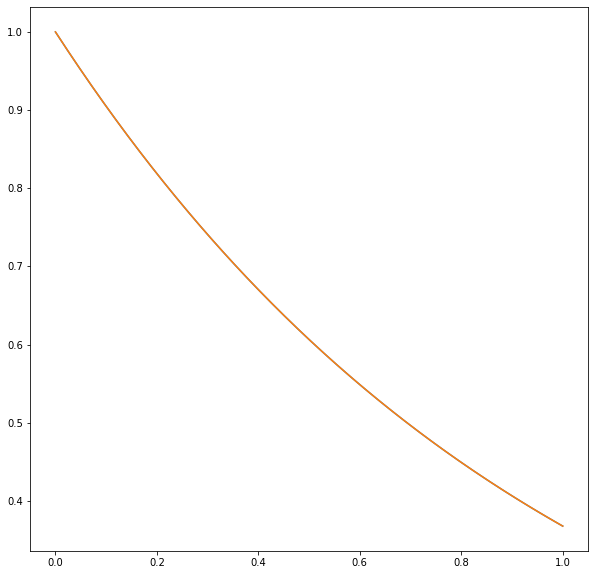

In [42]:
hh = (b - a) / (n * 3 - 1)
xxx = [ a + (hh * i) for i in range(n * 3)]

p = np.array(xxx)

plt.figure(figsize = (10,10))

plt.plot(p, y(p), p, [y_approx(p_) for p_ in p])

In [43]:
print("n: ", LA.norm(np.array([y_approx(p_) for p_ in p]) - np.array(y(p))))

n:  0.00015876965230171206
